# 最小角度回归LARS

## LARS的简单例子

In [2]:
from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=1)
reg.fit([[-1, 1], [0, 0], [1, 1]], [-1.1111, 0, -1.1111])
print(reg.coef_)

[ 0.     -1.1111]


## lasso的LARS实现

In [3]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=0.01)
reg.fit([[-1, 1], [0, 0], [1, 1]], [-1, 0, -1])
print(reg.coef_)

[ 0.         -0.96325765]


## LassoLars的糖尿病数据分析

In [4]:
# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

from sklearn import linear_model
from sklearn import datasets

In [5]:
X, y = datasets.load_diabetes(return_X_y=True)

print("使用LARS计算正则化路径 ...")
alphas, active, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)
alphas,coefs

使用LARS计算正则化路径 ...
.

(array([2.14804358, 2.01202713, 1.02466283, 0.71509967, 0.29441369,
        0.20086523, 0.15602991, 0.04520646, 0.01239247, 0.01151398,
        0.00493722, 0.00296479, 0.        ]),
 array([[   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,   -5.718948  ,   -7.01124515,
          -10.01219782],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,  -74.91651394, -111.97855446, -197.75650114,
         -226.13366183, -227.17579824, -234.39762164, -237.100786  ,
         -239.81908937],
        [   0.        ,   60.11926965,  361.89461246,  434.75795962,
          505.65955847,  511.3480707 ,  512.04408899,  522.26484702,
          526.88546671,  526.39059435,  522.64878576,  521.0751302 ,
          519.83978679],
        [   0.        ,    0.        ,    0.        ,   79.23644688,
          191.26988358,  234.15461616,  252.5270165 ,

In [6]:
# coefs是10* 13 矩阵，coefs.T 就是13 * 10矩阵
# axis =1, 意思是把每行的数据加起来，结果zz是13个元素的ndarray
# alphas是变小的，所以sum值会逐渐变大
zz = np.sum(np.abs(coefs.T), axis=1)
xx = zz/zz[-1]

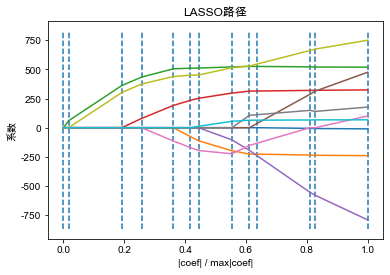

In [7]:
# 作10条线，每条线上13个点
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('系数')
plt.title('LASSO路径')
plt.axis('tight')
plt.show()